## Taking the image matrix

In [7]:
import numpy as np

image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1],
    [1, 0, 2, 2, 0],
    [2, 1, 0, 1, 2],
    [0, 1, 3, 1, 0]
])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

In [14]:
def convolve2d(img, kernel):
    kernel_size = kernel.shape[0]
    output_dim = img.shape[0] - kernel_size + 1
    result = np.zeros((output_dim, output_dim))
    for i in range(output_dim):
        for j in range(output_dim):
            region = img[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(region * kernel)
    return result

def max_pooling(feature_map, size=2, stride=1):
    h, w = feature_map.shape
    pooled_h = (h - size) // stride + 1
    pooled_w = (w - size) // stride + 1
    pooled = np.zeros((pooled_h, pooled_w))

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            region = feature_map[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(region)
    return pooled


def fully_connected(flattened_input, weights, bias):
    return np.dot(flattened_input, weights) + bias

In [22]:
conv_output = convolve2d(image, kernel)
print("After Convolution:\n", conv_output)

pooled_output = max_pooling(conv_output)
print("After Pooling:\n", pooled_output)

flattened = pooled_output.flatten()
print("After Flattening:\n", flattened)

weights = np.random.randn(flattened.size, 2)
bias = np.random.randn(2)

fc_output = fully_connected(flattened, weights, bias)
print("Final Output (FC Layer):\n", fc_output)


After Convolution:
 [[-5. -2.  5.]
 [-1. -4.  1.]
 [-2. -2.  3.]]
After Pooling:
 [[-1.  5.]
 [-1.  3.]]
After Flattening:
 [-1.  5. -1.  3.]
Final Output (FC Layer):
 [  2.8570811  -12.30944001]


## On mnist dataset

In [ ]:
%pip install matplotlib

True Label: 5


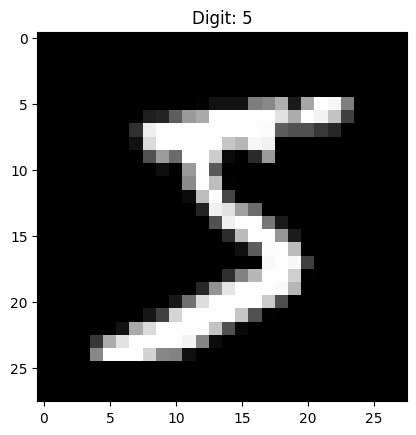

In [29]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (_, _) = mnist.load_data()

image = X_train[0] / 255.0
label = y_train[0]
print(f"True Label: {label}")

plt.imshow(image, cmap='gray')
plt.title(f"Digit: {label}")
plt.show()

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

In [33]:
def convolve2d(img, kernel):
    kernel_size = kernel.shape[0]
    output_dim = img.shape[0] - kernel_size + 1
    result = np.zeros((output_dim, output_dim))
    for i in range(output_dim):
        for j in range(output_dim):
            region = img[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(region * kernel)
    return result

def max_pooling(feature_map, size=2, stride=2):
    h, w = feature_map.shape
    pooled_h = (h - size) // stride + 1
    pooled_w = (w - size) // stride + 1
    pooled = np.zeros((pooled_h, pooled_w))

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            region = feature_map[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(region)
    return pooled


def fully_connected(flattened_input, weights, bias):
    return np.dot(flattened_input, weights) + bias

In [ ]:
conv_output = convolve2d(image, kernel)
pooled_output = max_pooling(conv_output)
flattened = pooled_output.flatten()

weights = np.random.randn(flattened.size, 10)
bias = np.random.randn(10)

fc_output = fully_connected(flattened, weights, bias)
predicted = np.argmax(fc_output)
# print(predicted)
print("Predicted Digit:", predicted) 

5
Predicted Digit: 5


## Using Library on Image matrix

In [1]:
import numpy as np
from keras.models import Sequential                          
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1],
    [1, 0, 2, 2, 0],
    [2, 1, 0, 1, 2],
    [0, 1, 3, 1, 0]
])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

model = Sequential([
   Conv2D(filters=1, kernel_size=(3, 3), padding='valid', activation='linear', input_shape=(5, 5, 1), use_bias=False),
   MaxPooling2D(pool_size=(2, 2)),
   Flatten(),
   Dense(units=1, activation='sigmoid')
])
model.layers[0].set_weights([kernel.reshape(3,3,1,1)])
model.compile(optimizer='adam', loss='mean_squared_error')

output = model.predict(image.reshape(1,5,5,1))
print(f"The output value is {output}")

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
The output value is [[0.6971818]]


## Using Library on Mnist dataset

True Label: 5


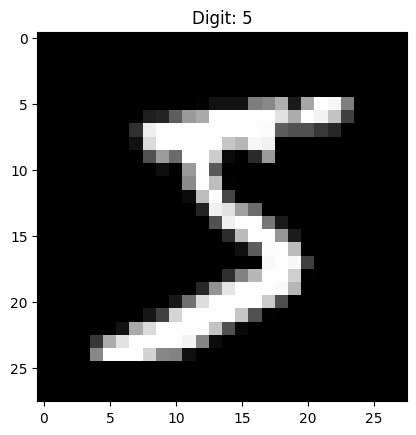

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
The output value is [[0.5]]


In [5]:
import numpy as np
from keras.models import Sequential                           
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (_, _) = mnist.load_data()

image = X_train[0] / 255.0
label = y_train[0]
print(f"True Label: {label}")

plt.imshow(image, cmap='gray')
plt.title(f"Digit: {label}")
plt.show()

patch = image[:5, :5].reshape(5, 5, 1)

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), padding='valid', activation='linear',
           input_shape=(5, 5, 1), use_bias=False),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

model.layers[0].set_weights([kernel.reshape(3, 3, 1, 1)])
model.compile(optimizer='adam', loss='mean_squared_error')

output = model.predict(patch.reshape(1, 5, 5, 1))
print(f"The output value is {output}")
